In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in Lpa)')

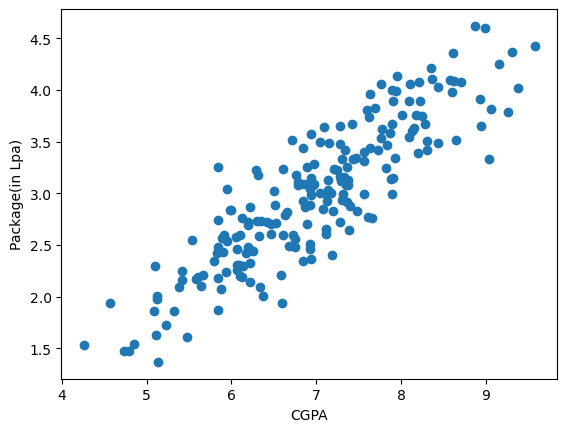

In [4]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in Lpa)')

In [5]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression()

In [9]:
lr.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'Package(in Lpa)')

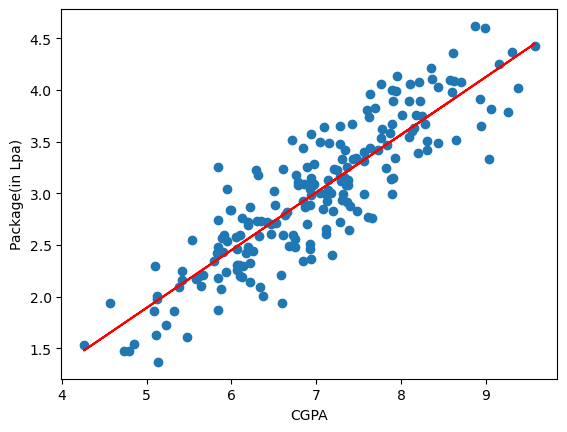

In [10]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.xlabel('CGPA')
plt.ylabel('Package(in Lpa)')

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
y_pred = lr.predict(X_test)

In [13]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [15]:
print("MAE", mean_absolute_error(y_test, y_pred))

MAE 0.2884710931878175


In [17]:
print("MSE", mean_squared_error(y_test, y_pred))

MSE 0.12129235313495527


In [18]:
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE 0.34827051717731616


In [20]:
print("R2 Square", r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)

R2 Square 0.780730147510384


In [21]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [22]:
1 - ((1 - r2)*(40 - 1) / (40 - 1 - 1))

0.7749598882343415

In [23]:
# ADD unrevelent column
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa', 'random_feature', 'package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.092424,3.26
1,5.12,0.636369,1.98
2,7.82,0.376958,3.25
3,7.42,0.746701,3.67
4,6.94,0.467989,3.57


Text(0, 0.5, 'Package(in LPA)')

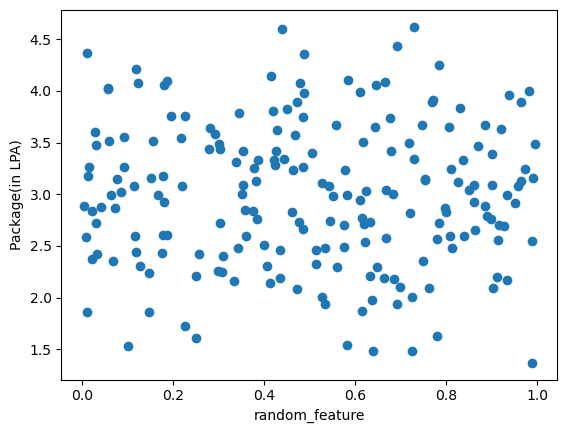

In [25]:
plt.scatter(new_df1['random_feature'], new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in LPA)')

In [26]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = lr.predict(X_test)

In [31]:
print("R2 score", r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

R2 score 0.7806427725797255


In [32]:
1 - ((1 - r2)*(40 - 1) / (40 - 1 - 2))

0.7687856251516025

In [33]:
# ADD revelent column
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [34]:
new_df2.sample(5)

,cgpa,iq,package
114,5.84,2.27,1.87
140,7.91,4.25,3.15
48,8.63,2.89,4.09
53,6.47,2.11,2.61
135,6.10,2.50,2.60


Text(0, 0.5, 'Package(in LPA)')

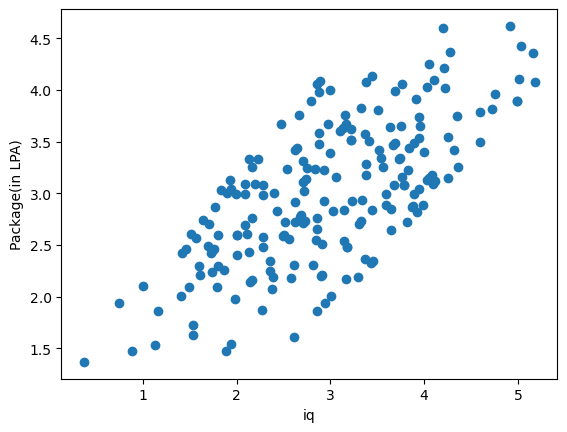

In [35]:
plt.scatter(new_df2['iq'], new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in LPA)')

In [36]:
np.random.randint(-100,100)

-21

In [37]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [41]:
print('R2 score', r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

R2 score 0.7979299518790542


In [42]:
1 - ((1 - r2)*(40 - 1) / (40 - 1 - 2))

0.7870072465752194